Training Model and Extracting Outcomes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data = pd.read_csv("data/processed_titanic.csv")


Seprate features and targets

In [4]:
titanic_data.head

<bound method NDFrame.head of      Survived  Pclass  Sex        Age  SibSp  Parch     Fare  FamilySize  \
0           0       3    0  22.000000      1      0   7.2500           2   
1           1       1    1  38.000000      1      0  71.2833           2   
2           1       3    1  26.000000      0      0   7.9250           1   
3           1       1    1  35.000000      1      0  53.1000           2   
4           0       3    0  35.000000      0      0   8.0500           1   
..        ...     ...  ...        ...    ...    ...      ...         ...   
886         0       2    0  27.000000      0      0  13.0000           1   
887         1       1    1  19.000000      0      0  30.0000           1   
888         0       3    1  29.699118      1      2  23.4500           4   
889         1       1    0  26.000000      0      0  30.0000           1   
890         0       3    0  32.000000      0      0   7.7500           1   

     IsAlone  Embarked_Q  Embarked_S  Title_Miss  Title_M

In [5]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Model Train

In [7]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Model Evalution

In [10]:
y_pred = model.predict(X_test)

Accuracy: 0.8044692737430168


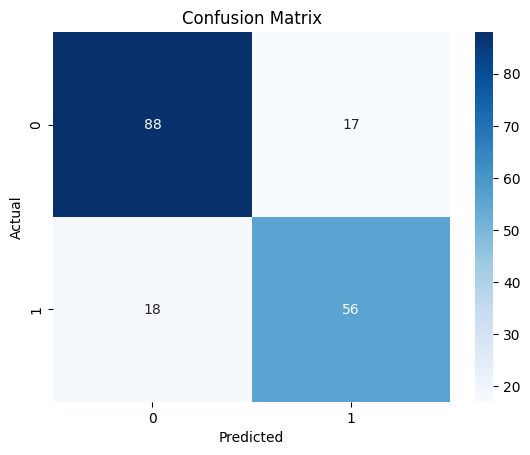

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

Feature Importance

In [12]:
pd.Series(model.coef_[0], index=X.columns).sort_values()

Title_Mr     -2.330247
Title_Rare   -1.436248
Pclass       -0.853320
Title_Miss   -0.514537
Embarked_S   -0.406362
IsAlone      -0.311322
FamilySize   -0.298427
SibSp        -0.206149
Parch        -0.109943
Embarked_Q   -0.073559
Age          -0.026122
Fare          0.004032
Title_Mme     0.033329
Title_Mlle    0.066233
Title_Ms      0.135729
Title_Mrs     0.575389
Sex           0.818042
dtype: float64